# Fraud Amount Visualizations & Fraud Rates

In [1]:
import helpers as h
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import matplotlib.gridspec as gs

%matplotlib inline

data = pd.read_csv("../data/creditcard.csv")
Features = ['V%d' % n for n in range(1, 29)]


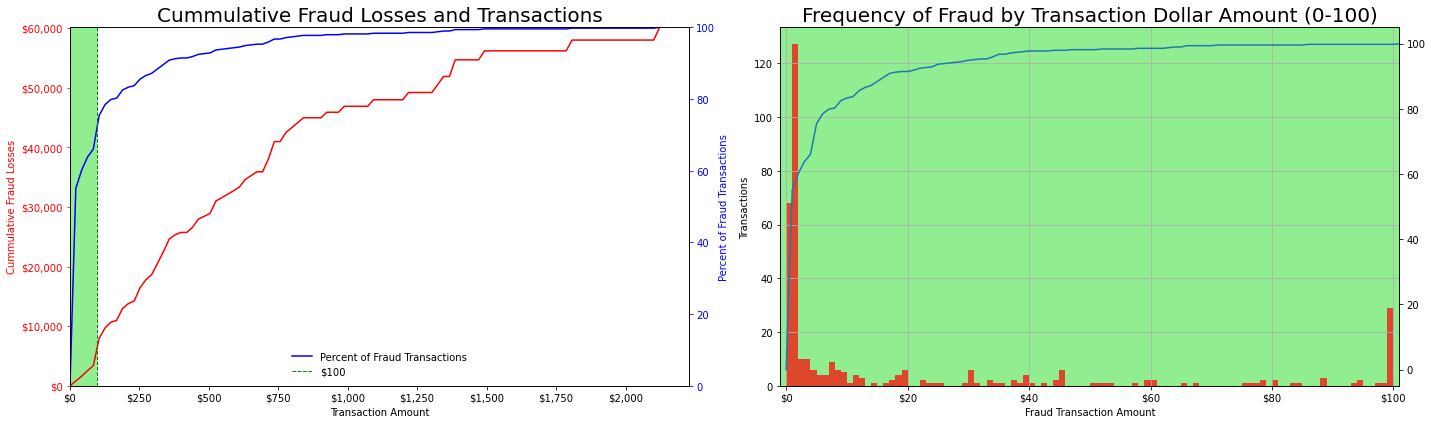

In [2]:

def graph_amount_cdf(ax, x, y1, y2, ymax):
    '''
        Creates plot representing the cdf of the fraud amounts
        
        ARGS:
            ax - plot axis
            x - list of features names to plot against
            y1 - list of cummulative amounts for fraud transactions
            y2 - cdf of fraud transactions
            ymax - the upper limit for y axis on plot
           
        Return:
           ax - plot axis
    '''  
    
    percent =  ticker.FormatStrFormatter('%1.0f')
    currency = mtick.StrMethodFormatter('${x:,.0f}')
    
    ax.plot(x, y1, color='red', label="Cummulative Fraud Loss")
    ax.xaxis.set_major_formatter(currency)
    ax.set_xlabel("Transaction Amount")
    ax.yaxis.set_major_formatter(currency)
    ax.set_ylabel("Cummulative Fraud Losses", c="r")
    ax.tick_params(axis='y', colors='red')

    ax.fill_between(np.arange(0, 100, 1), 0, ymax, facecolor='lightgreen')

    ax.set_xlim(0, right=None)
    ax.set_ylim(0, ymax)
    ax_2 = ax.twinx() 
    ax_2.plot(x, y2, color='blue', label="Percent of Fraud Transactions")
    ax_2.set_ylabel("Percent of Fraud Transactions", color="blue")
    ax_2.yaxis.set_major_formatter(percent)
    ax_2.tick_params(axis='y', colors='blue')
    ax_2.set_ylim(0,100)

    plt.title("Cummulative Fraud Losses and Transactions", fontsize=20)
    plt.axvline(x=100, color='green', linestyle='dashed', linewidth=1, label='$100')
    plt.legend(loc='lower center', frameon=False)
    plt.tight_layout() 
    
def amount_cdf_data(data):
    '''
        Creates 3 lists used for plotting fraud eda chart
        
        ARGS:
            data -> pandas df
           
        Return:
            x - list of features names to plot against
            y1 - list of cummulative amounts for fraud transactions
            y2 - cdf of fraud transactions
    '''  
    max_amt = data['Amount'].max()
    transaction_cnt = data['Amount'].count()
    x = [n for n in range(1,int(max_amt),int(max_amt/100))]
    y1 = []
    y2 = []
    for n in range(102):
        y1.append(data[data['Amount']<(.01*n*max_amt)]['Amount'].sum())
        y2.append(((data[data['Amount']<(.01*n*max_amt)]['Amount'].count())/transaction_cnt)*100)
    ymax = np.max(y1)
    return x, y1, y2, ymax

def graph_amounts_frequency(ax, y2, data, xlimit):
    '''
        Creates plots showing frequency of fraud at different transaction amounts
        
        ARGS:
            ax - plot axis
            y2 - list of cdf values to plot
            data -> pandas df
            xlimit -> x-axis graph upper limit
           
        Return:
            ax - axis with plot
    '''    
    gr_data = data.copy()
    gr_data[gr_data['Amount']<xlimit]['Amount'].hist(ax=ax, bins=100, color='red', alpha=0.7)
    ax.set_title("Frequency of Fraud by Transaction Dollar Amount (0-100)", fontsize=20)
    ax.set_xlabel('Fraud Transaction Amount')
    ax_2 = ax.twinx() 
    ax_2.plot(y2)
    currency = mtick.StrMethodFormatter('${x:,.0f}')
    ax.xaxis.set_major_formatter(currency)
    ax.set_ylabel('Transactions')
    ax.set_xlim(-1,101)
    ax.set_facecolor('lightgreen')

def plot_fraud_amount_eda(data, gs):
    '''
        Creates image with multiple plots for Fraud Amount EDA Visualatioin
        
        ARGS:
            data -> pandas df
            gs -> Gridspec
           
        Return:
            None
    '''    
    df_fraud = data[data['Class']==1]
    df_legit = data[data['Class']==0]

    fig = plt.figure(figsize=(20,6))
    ax1 = fig.add_subplot(gs[0:-1])

    x, y1, y2, ymax = amount_cdf_data(df_fraud)
    graph_amount_cdf(ax1, x, y1, y2, ymax)

    ax2 = fig.add_subplot(gs[1:])
    graph_amounts_frequency(ax2, y2, data=df_fraud, xlimit=100)

    plt.tight_layout()
    fig.savefig("../img/AmountPlots.png")

gs = gs.GridSpec(1,2)    
plot_fraud_amount_eda(data=data, gs=gs)

# Fraud Rates

In [3]:
def fraud_rate(TranAmt, data=data, cummulative=False):
    '''
        Prints the fraud rates for specific price points
        
        ARGS:
            TranAmt -> dollar value to rate analysis
            data -> pandas df
            cummulative - boolean value if rate should include all values below TranAmt
           
        Return:
            None
    '''    

    if TranAmt == 0:
        print(f"Overall Fraud rate: {100 * data['Class'].mean():0.2f}%")
    else:
        if cummulative:
            print(f"<=${TranAmt:0.2f} Fraud rate: {100 * data[data['Amount']<=TranAmt]['Class'].mean():0.2f}%")
        else:
            print(f"${TranAmt:0.2f} Fraud rate: {100 * data[data['Amount']==TranAmt]['Class'].mean():0.2f}%")
    return None

fraud_rate(0)
fraud_rate(99.99)
fraud_rate(1.00)
fraud_rate(1.00, cummulative=True)

Overall Fraud rate: 0.17%
$99.99 Fraud rate: 8.18%
$1.00 Fraud rate: 0.83%
<=$1.00 Fraud rate: 0.59%
